#### RETALS BUSINESS ANALYSIS

As an asset management company, looking forward to investing in a few companies, while considering the global trends in investment.

This Analysis was carried out to help Retals make a good and data-driven investment decision by analysing the global trend of investment. Retal will like to invest where other investors are investing giving this constraint;

- To invest between 5 to 15 million USD per round of investment
- To invest only in English-speaking countries because of the ease of communication with the companies it would invest in! Hence, for this analysis, only English-speaking countries (or countries which have English as one of their official languages) were put into consideration.


The main objective of this analysis was to identify the best sectors, countries, and suitable investment types for Retals



#### Steps Taken
The whole analysis is group into four majors steps
- Data Collection
- Data Cleaning and Preparation
- Analysis
- Result and Conclusion

## Data Collection

Investment data was collected from Crunchbase.com for this analysis

The data are included in 3 different files
- companies: A table with basic data of companies
- rounds2 — have numerous sub-sector
- mapping.csv: This file maps the numerous category names in the companies table (such 3D printing, aerospace, agriculture, etc.) to eight broad sector names


### Importing of the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#### Loading in of the dataset

In [2]:
# the data is encoded in a way (latin1) different from the default encoder (utf-8)
companies = pd.read_table('companies.txt', encoding= 'latin1' )

### Viewing the data
Viewing the data to obtain basic information about the data using the `head()` and `info()` method.

In [3]:
# checking the head of the data to have an idea of what the data looks like
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
# brief summary of the variables present in the dataframe
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


There are missing value in most of the columns  

In [37]:
#percentage of NA values present in each columns of the companies dataframe
companies.isnull().sum()/len(companies.index)*100

permalink         0.000000
name              0.001507
homepage_url      7.621143
category_list     4.743250
status            0.000000
country_code     10.483968
state_code       12.878194
region           12.099204
city             12.096191
founded_at       22.934245
dtype: float64

In [3]:
round2 = pd.read_csv('rounds2.csv', encoding='latin1')

In [39]:
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [40]:
round2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [41]:
#percentage of missing values present in each columns of the round2 dataframe
round2.isnull().sum()/len(round2.index)*100

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

some of the columns of the rounds dataframe also contain missing values

In [143]:
# Checking the count of unique values present in each variables
companies.nunique()

permalink        66368
name             66102
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

In [26]:
round2.nunique()

company_permalink           90247
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
dtype: int64


## Data Cleaning and Preparation
From the information obtained above, the following will need to be done to fix the data format. 
<br>
Examples: 
* Correcting Typos and invalid data.
* Correcting Inconsistent data.
* Removal of null or missing value
* Removal of duplicate value
* Converting th dataframe to appropriate format for analysis

merging of the companies and rounds dataframe to produce a single dataframe for further analysis

In [88]:
# comparing the the two dataframes to see the number of observation that are present in the dataframes before merging
# them together for further analysis
companies[~(companies['permalink'].str.lower().isin(round2['company_permalink'].str.lower()))]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
16827,/Organization/E-Cãbica,E CÃBICA,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN
18197,/Organization/Energystone-Games-Çµçÿ³Æ¸¸Æ,EnergyStone Games çµç³æ¸¸æ,NaN,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,06-01-2013
26139,/Organization/Huizuche-Com-Æ Ç§è½¦,Huizuche.com æ ç§è½¦,http://huizuche.com,NaN,closed,NaN,NaN,NaN,NaN,24-04-2014
58344,/Organization/Tipcat-Interactive-Æ²Èä¿¡Æ¯Ç...,TipCat Interactive æ²èä¿¡æ¯ç§æ,http://www.tipcat.com,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,18-08-2009
65778,/Organization/Zengame-Ç¦ Æ¸¸Ç§Æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010


In [91]:
round2[~(round2['company_permalink'].str.lower().isin(companies['permalink'].str.lower()))]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [4]:
# the dataframe can be merge on the variable similar to each other 
# the company-permalink column for the companies dataframe is similar to the permalink column in round2 dataframe
companies['permalink']=companies['permalink'].str.lower()
round2['company_permalink']=round2['company_permalink'].str.lower()

In [5]:
# the two dataframes are merged together to produce single dataframe (master_frame) 
master_frame = pd.merge(companies, round2, left_on='permalink', right_on='company_permalink')

In [166]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [81]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114942 non-null  object 
 1   name                     114941 non-null  object 
 2   homepage_url             108810 non-null  object 
 3   category_list            111535 non-null  object 
 4   status                   114942 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94422 non-null   object 
 10  company_permalink        114942 non-null  object 
 11  funding_round_permalink  114942 non-null  object 
 12  funding_round_type       114942 non-null  object 
 13  funding_round_code       31139 non-null   object 
 14  fund

In [82]:
master_frame.isnull().sum()/len(master_frame.index)*100

permalink                   0.000000
name                        0.000870
homepage_url                5.334865
category_list               2.964104
status                      0.000000
country_code                7.543805
state_code                  9.516974
region                      8.839241
city                        8.836631
founded_at                 17.852482
company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.908945
funded_at                   0.000000
raised_amount_usd          17.386160
dtype: float64

In [6]:
#dropping the funding_round_code and founded_at column due to large amount of NA values
master_frame.drop(['funding_round_code','founded_at'],axis=1, inplace=True)

In [7]:
#dropping all NA values
master_frame=master_frame.dropna()

In [96]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83281 entries, 0 to 114940
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                83281 non-null  object 
 1   name                     83281 non-null  object 
 2   homepage_url             83281 non-null  object 
 3   category_list            83281 non-null  object 
 4   status                   83281 non-null  object 
 5   country_code             83281 non-null  object 
 6   state_code               83281 non-null  object 
 7   region                   83281 non-null  object 
 8   city                     83281 non-null  object 
 9   company_permalink        83281 non-null  object 
 10  funding_round_permalink  83281 non-null  object 
 11  funding_round_type       83281 non-null  object 
 12  funded_at                83281 non-null  object 
 13  raised_amount_usd        83281 non-null  float64
dtypes: float64(1), object

In [100]:
master_frame.isna().sum()/len(master_frame.index)*100

permalink                  0.0
name                       0.0
homepage_url               0.0
category_list              0.0
status                     0.0
country_code               0.0
state_code                 0.0
region                     0.0
city                       0.0
company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

## Investment Type Analysis
#### Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so as to choose the type that is best suited for the analysis

In [101]:
# summary statistics of the amount invested accross all the different fund type 
master_frame.describe()

,raised_amount_usd
count,8.328100e+04
mean,1.031270e+07
std,1.111885e+08
min,0.000000e+00
25%,3.788120e+05
50%,1.800000e+06
75%,7.080000e+06
max,2.127194e+10


In [8]:
# summary statistics across different funding type
master_frame.groupby('funding_round_type').describe()

raised_amount_usd                                       \
                                  count          mean           std      min   
funding_round_type                                                             
angel                            4238.0  9.752029e+05  7.849841e+06      0.0   
convertible_note                 1249.0  1.379895e+06  6.154574e+06      0.0   
debt_financing                   6147.0  1.664649e+07  2.882509e+08      0.0   
equity_crowdfunding               895.0  5.453219e+05  1.712641e+06      0.0   
grant                            1867.0  4.601210e+06  2.706987e+07      0.0   
non_equity_assistance              57.0  5.014948e+05  1.998128e+06      0.0   
post_ipo_debt                     150.0  1.704481e+08  6.063084e+08  70000.0   
post_ipo_equity                   579.0  6.316833e+07  2.061598e+08     77.0   
private_equity                   1691.0  7.116546e+07  1.729189e+08      0.0   
product_crowdfunding              322.0  1.361448e+06  4.381044e+06      0.0   
secondary_market                   28.0  8.443853e+07  1.439256e+08   2323.0   
seed                            20046.0  7.452998e+05  2.033432e+06      0.0   
undisclosed                      1175.0  1.376043e+07  1.416934e+08      0.0   
venture                         44837.0  1.171285e+07  8.815567e+07      0.0   

                                                                          
                              25%         50%          75%           max  
funding_round_type                                                        
angel                   156281.50    425000.0   1000000.00  4.945120e+08  
convertible_note        100000.00    323340.0   1000000.00  1.500000e+08  
debt_financing          350000.00   1135000.0   4000000.00  2.127194e+10  
equity_crowdfunding      15000.00    110173.0    390638.00  2.740000e+07  
grant                    58765.50    235536.0   1789071.00  7.500000e+08  
non_equity_assistance    27000.00     60000.0    185534.00  1.500000e+07  
post_ipo_debt          4000000.00  17450000.0  60000000.00  5.800000e+09  
post_ipo_equity        3815373.50  12000000.0  36800000.00  3.200000e+09  
private_equity         5000000.00  20000000.0  75000000.00  3.500000e+09  
product_crowdfunding     50154.25    211500.0    793156.25  5.200000e+07  
secondary_market       5675000.00  45850000.0  88750000.00  6.806116e+08  
seed                     71165.75    300000.0   1000000.00  2.000000e+08  
undisclosed             265173.00   1073000.0   4668228.00  4.630000e+09  
venture                1617000.00   5000000.0  12000000.00  1.760000e+10

In [103]:
# slicing the four main funding type required for the analysis 
master1=master_frame[master_frame['funding_round_type'].isin(['private_equity', 'venture', 'seed', 'angel'])]

In [104]:
master1.isnull().sum()/len(master1.index)*100

permalink                  0.0
name                       0.0
homepage_url               0.0
category_list              0.0
status                     0.0
country_code               0.0
state_code                 0.0
region                     0.0
city                       0.0
company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

Calculating the most representative value of the investment amount for each of the four funding types
in other to choose the most suitable investment  type for the company

In [105]:
# selecting the most representative investment type using the mean of the investment amount is inapproproate 
# this is due to the fact that the amount invested for each funding type are skewed as shown by the summary statistics, 
#which signifies the present of an outlier and hence, making the median the 
# approriate measure for the suitable investment type
fund=master1.groupby('funding_round_type').agg({'raised_amount_usd':np.median})


In [106]:
fund.sort_values(by='raised_amount_usd', ascending=False )

,raised_amount_usd
funding_round_type,
private_equity,20000000.0
venture,5000000.0
angel,425000.0
seed,300000.0


- Seeing that only venture falls in the range (5-15million) of invested amount makes it the suitable funding type or investment type

In [107]:
# slicing out the data for the suitable investment type
master2=master1[master1['funding_round_type']=='venture']

## Country Analysis
#### Identifying the countries which have been the most heavily invested in the past and are also English speaking countries.

In [113]:
reg=master2.groupby('country_code').agg({'raised_amount_usd':sum})

In [114]:
# top9 countries with highest amount of funding
reg.sort_values(by='raised_amount_usd', ascending=False).head(9)

,raised_amount_usd
country_code,
USA,3.978218e+11
CHN,3.562355e+10
GBR,1.863205e+10
IND,1.383492e+10
CAN,8.895475e+09
FRA,6.666626e+09
ISR,6.367861e+09
DEU,6.088517e+09
JPN,3.011058e+09


In [116]:
reg1=master2.groupby('country_code').agg({'raised_amount_usd':sum})
top=reg1.sort_values(by='raised_amount_usd', ascending=False).head(9)                                  

In [117]:
# filtering out the top9 countries
top9=master2[master2['country_code'].isin(top.index)]
top9_ft=master1[master1['country_code'].isin(top.index)]

In [134]:
# filtering out the top3 english speaking countries
top3=top9[top9['country_code'].isin(['GBR','USA','CAN'])]

- Given the fact that retals will like to invest in english speaking country for ease of communication USA, Great Britain(GBR) and Canada will be the best choice

## Sector Analysis

#### Understanding the distribution of investments across the eight main sectors.

In [119]:
# Creating new variables 'primary sector' to allow the merging of the dataframes with main sector
top9.loc[:,'primary_sector']=top9['category_list'].apply(lambda x: x.split('|')[0])

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [120]:
top9['category_list'].nunique()

8384

In [122]:
top9['primary_sector'].nunique()

578

In [123]:
top9.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,Curated Web
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Biotechnology
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps
28,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,Education
34,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,Curated Web
38,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0,Curated Web


### Loading in of the mapping dataset, which contains the main sectors data

In [124]:
# Loading the mapping dataset, which contain the information about the main sector
mapping= pd.read_csv('mapping.csv', encoding='latin1')

In [125]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [127]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [126]:
# Checking the unique category_list
mapping['category_list'].unique()

array([nan, '3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alter0tive Medicine', 'Alumni',
       'A0lytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'B

#### Cleaning of the dataframes

In [128]:
# droping the rows that contains missing value from the mapping dataframes
mapping=mapping.dropna()

In [129]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      687 non-null    int64 
 2   Blanks                                   687 non-null    int64 
 3   Cleantech / Semiconductors               687 non-null    int64 
 4   Entertainment                            687 non-null    int64 
 5   Health                                   687 non-null    int64 
 6   Manufacturing                            687 non-null    int64 
 7   News, Search and Messaging               687 non-null    int64 
 8   Others                                   687 non-null    int64 
 9   Social, Finance, Analytics, Advertising  687 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 59.0+ KB


In [130]:
mapping['category_list']=mapping['category_list'].apply(lambda x:x.replace('0','na'))

In [66]:
mapping['category_list'].unique()

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alternative Medicine', 'Alumni',
       'Analytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'Bank

In [131]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [132]:
top3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


In [135]:
# merging of the two dataframes
main_sector=pd.merge(top3, mapping, left_on='primary_sector', right_on='category_list')

In [136]:
# melting of the multiple main sector columns into a key(main_sectors) and value(values) columns
new_main=pd.melt(main_sector, main_sector.columns[:18],main_sector.columns[18:], 'main_sectors', 'values')


In [137]:
# dropping of the blank sector
main_sector.drop('Blanks', axis=1, inplace=True)

In [138]:
new_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259644 entries, 0 to 259643
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                259644 non-null  object 
 1   name                     259644 non-null  object 
 2   homepage_url             259644 non-null  object 
 3   category_list_x          259644 non-null  object 
 4   status                   259644 non-null  object 
 5   country_code             259644 non-null  object 
 6   state_code               259644 non-null  object 
 7   region                   259644 non-null  object 
 8   city                     259644 non-null  object 
 9   company_permalink        259644 non-null  object 
 10  funding_round_permalink  259644 non-null  object 
 11  funding_round_type       259644 non-null  object 
 12  funded_at                259644 non-null  object 
 13  raised_amount_usd        259644 non-null  float64
 14  prim

In [139]:
# removal of unwanted rows or observation from the dataframes 
new_main=new_main[new_main['values']==1]
new_main.drop('values', axis=1, inplace=True)

In [140]:
# dropping of some columns not required for the analysis
new_main=new_main[['permalink', 'name','category_list_x', 'status','country_code', 'company_permalink', 'funding_round_permalink', 'funding_round_type','raised_amount_usd','primary_sector','main_sectors']]

In [141]:
#subsetting the rquired investment amount of the company from the dataframes(5-15million)
new_main=new_main[(new_main['raised_amount_usd']>=5000000) & (new_main['raised_amount_usd']<=15000000)]

In [143]:
new_main.groupby(['country_code', 'main_sectors' ]).agg({'raised_amount_usd':'sum','main_sectors': 'count'})


raised_amount_usd  \
country_code main_sectors                                                 
CAN          Cleantech / Semiconductors                    9.386637e+08   
             Entertainment                                 1.600221e+08   
             Health                                        1.621451e+08   
             Manufacturing                                 2.306331e+08   
             News, Search and Messaging                    3.786711e+08   
             Others                                        8.249901e+08   
             Social, Finance, Analytics, Advertising       6.461431e+08   
GBR          Cleantech / Semiconductors                    1.016761e+09   
             Entertainment                                 4.647237e+08   
             Health                                        1.867220e+08   
             Manufacturing                                 3.046903e+08   
             News, Search and Messaging                    5.779207e+08   
             Others                                        1.155156e+09   
             Social, Finance, Analytics, Advertising       1.042295e+09   
USA          Cleantech / Semiconductors                    2.005947e+10   
             Entertainment                                 4.953440e+09   
             Health                                        7.745753e+09   
             Manufacturing                                 6.827639e+09   
             News, Search and Messaging                    1.351189e+10   
             Others                                        2.441200e+10   
             Social, Finance, Analytics, Advertising       2.325846e+10   

                                                      main_sectors  
country_code main_sectors                                           
CAN          Cleantech / Semiconductors                        104  
             Entertainment                                      23  
             Health                                             20  
             Manufacturing                                      30  
             News, Search and Messaging                         42  
             Others                                             97  
             Social, Finance, Analytics, Advertising            77  
GBR          Cleantech / Semiconductors                        113  
             Entertainment                                      54  
             Health                                             20  
             Manufacturing                                      34  
             News, Search and Messaging                         68  
             Others                                            132  
             Social, Finance, Analytics, Advertising           127  
USA          Cleantech / Semiconductors                       2173  
             Entertainment                                     575  
             Health                                            855  
             Manufacturing                                     754  
             News, Search and Messaging                       1534  
             Others                                           2744  
             Social, Finance, Analytics, Advertising          2648

## Result and Conclusion

# Data  Visualization

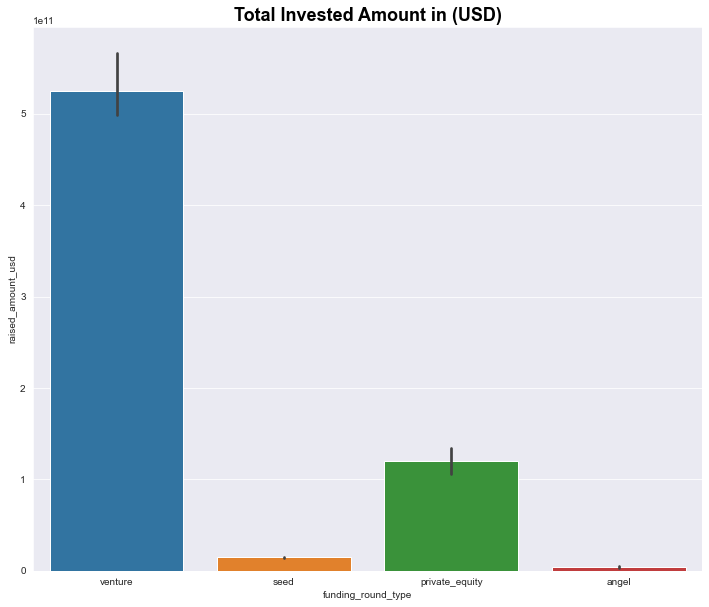

In [150]:
# plot showing the total amount of investment of different investment type 
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')
sns.barplot(data=master1, x='funding_round_type', y='raised_amount_usd', estimator=np.sum)
plt.title('Total Invested Amount in (USD)', fontdict=fontdict, color='black');


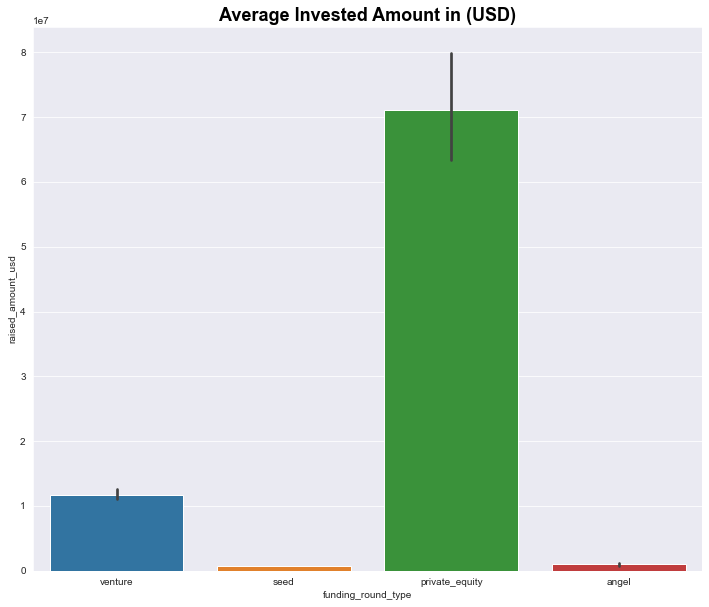

In [149]:
#plot showing the average amount of investment of different investment type
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')
sns.barplot(data=master1, x='funding_round_type', y='raised_amount_usd', estimator=np.mean)
plt.title('Average Invested Amount in (USD)',fontdict=fontdict, color='black');


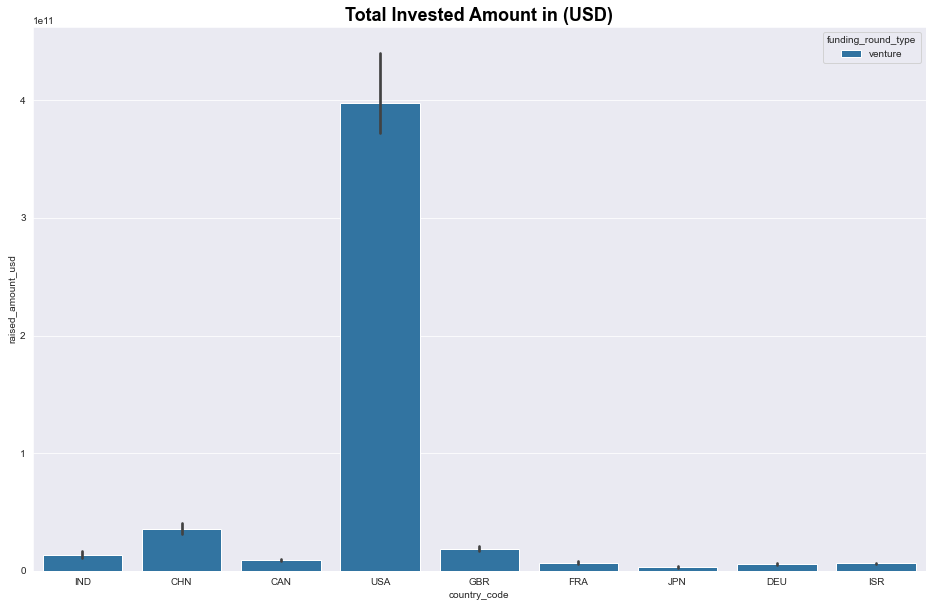

In [148]:
# plot showing the total amount of chosen investment type across the top9 countries
plt.figure(figsize=(16,10))
sns.set_style('darkgrid')
sns.barplot(data=top9, x='country_code', y='raised_amount_usd',hue='funding_round_type', estimator=np.sum)
plt.title('Total Invested Amount in (USD)', fontdict=fontdict, color='black');

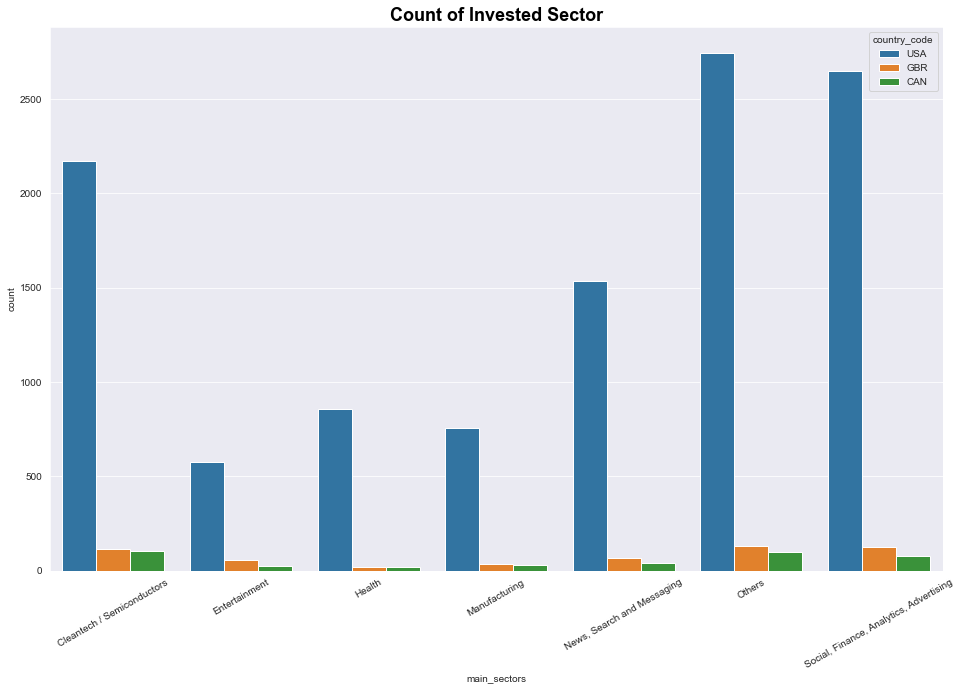

In [146]:
# plot showing the count of the invested sector across the top3 English speaking countries
plt.figure(figsize=(16,10))
sns.set_style('darkgrid')
fontdict={'fontsize':18, 'weight':'bold', 'horizontalalignment':'center'}
fontdictx={'fontsize':18, 'weight':'bold', 'horizontalalignment':'center'}
fontdicty={'fontsize':18, 'weight':'bold','verticalalignment':'baseline', 'horizontalalignment':'center'}
a=sns.countplot(data=new_main, x='main_sectors', hue='country_code')
a.set_xticklabels(a.get_xticklabels(),rotation=30)
plt.title('Count of Invested Sector', fontdict=fontdict, color='black');

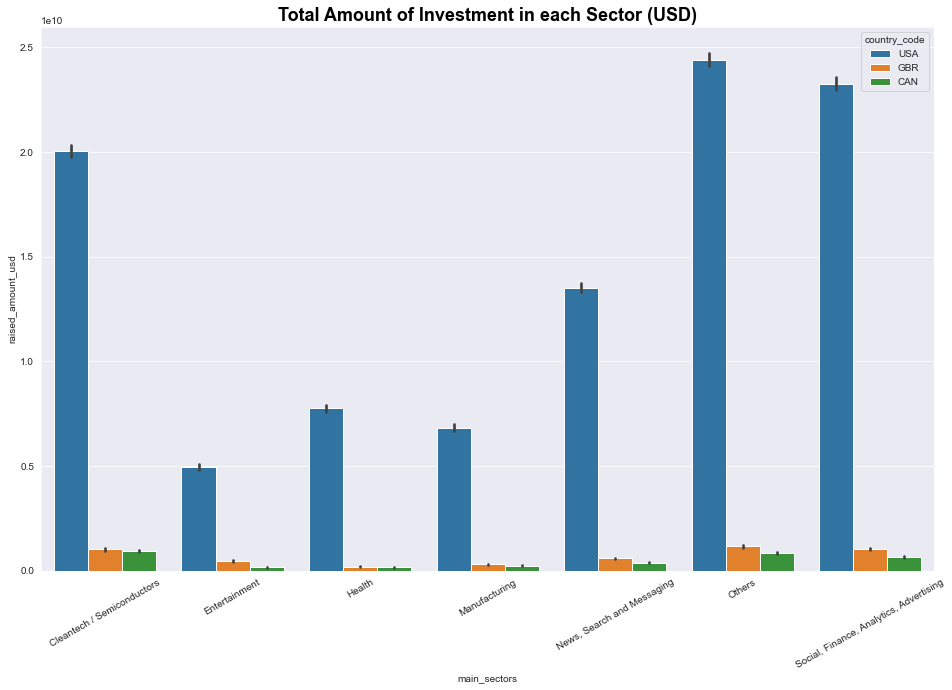

In [147]:
# plot showing the total amount invested in each sector across the top3 English speaking countries
plt.figure(figsize=(16,10))
sns.set_style('darkgrid')
a=sns.barplot(data=new_main, x='main_sectors',y='raised_amount_usd', hue='country_code', estimator=np.sum)
a.set_xticklabels(a.get_xticklabels(),rotation=30)
plt.title('Total Amount of Investment in each Sector (USD)', fontdict=fontdict, color='black');

## Conclusion

Based on the above analysis, it can be concluded that Retals would be making a good and wise decision choosing VENTURE investment type and the best sectors would be the cleantech, entertainment, health, manufacturing, social /finance/advertising, news/messaging and others across the United States of America, Great Britain and Canada